In [69]:
# ------- IMPORTS ------

import matplotlib.pyplot as plt
from    matplotlib import colors
import numpy as np
import scipy
from scipy.optimize import curve_fit

# from scipy.stats import ks_2samp


In [39]:
# Define the input, open file

infile = '../data/8gev_2099.npy'
with open(infile, 'rb') as f: Xtot = np.load(f)



In [40]:
print(f'''Read an array: {Xtot.shape}''')
X = Xtot[:,:,:31] # discard the last bin as it's hardwired to '-999'

print(f'''Selected: {X.shape}''')

Read an array: (105230, 64, 32)
Selected: (105230, 64, 31)


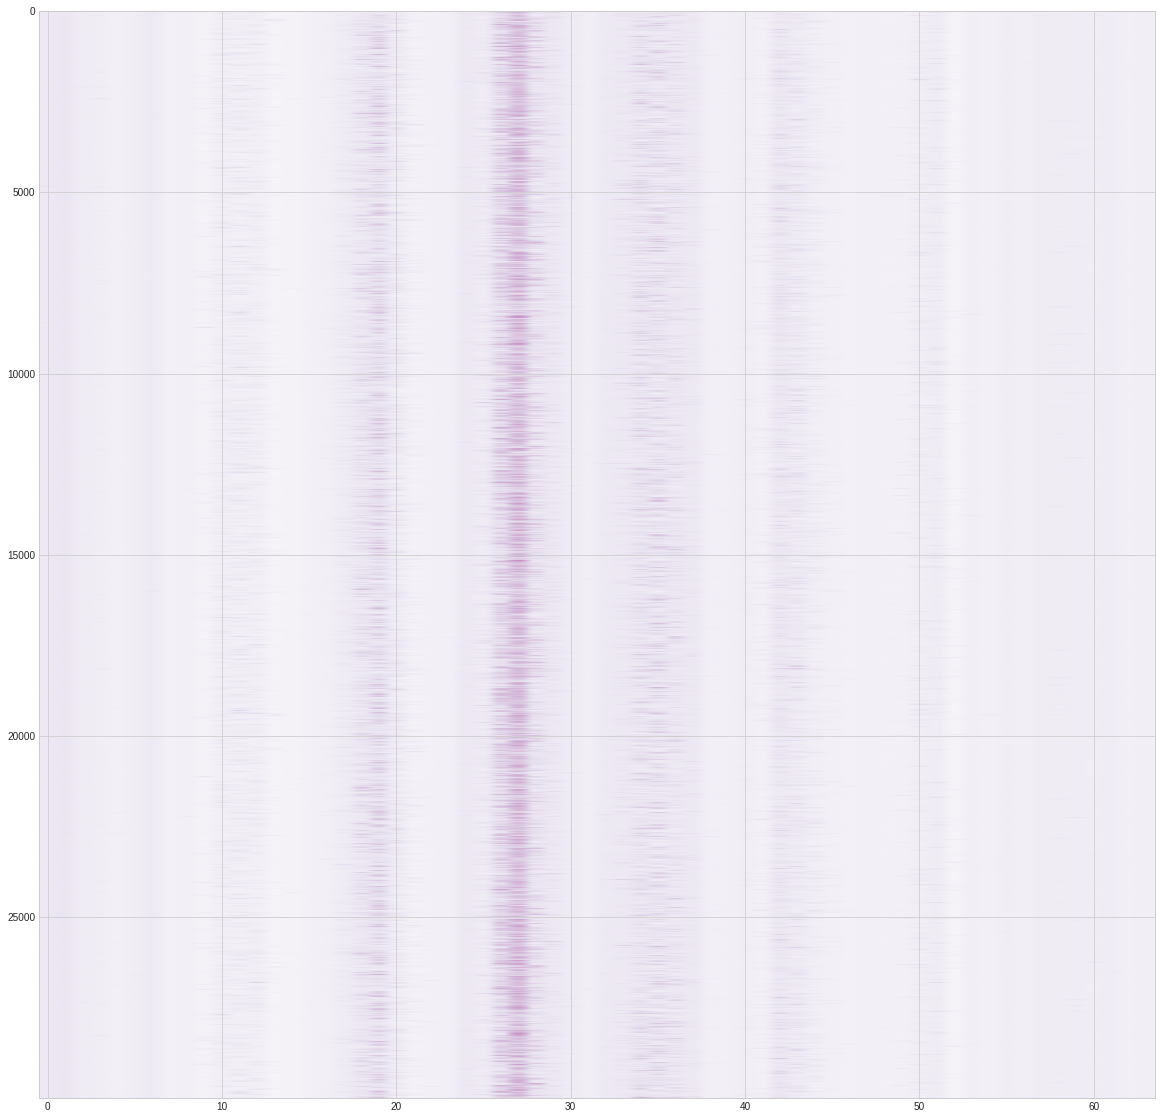

In [104]:
N = 30000

all_maxima = np.empty((N,64))

for i in np.arange(N):

    maxima = np.amax(X[i], axis=1)
    all_maxima[i] = maxima

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (20,20)
_ = plt.imshow(all_maxima, norm=colors.LogNorm(), cmap='PuRd', aspect='auto')


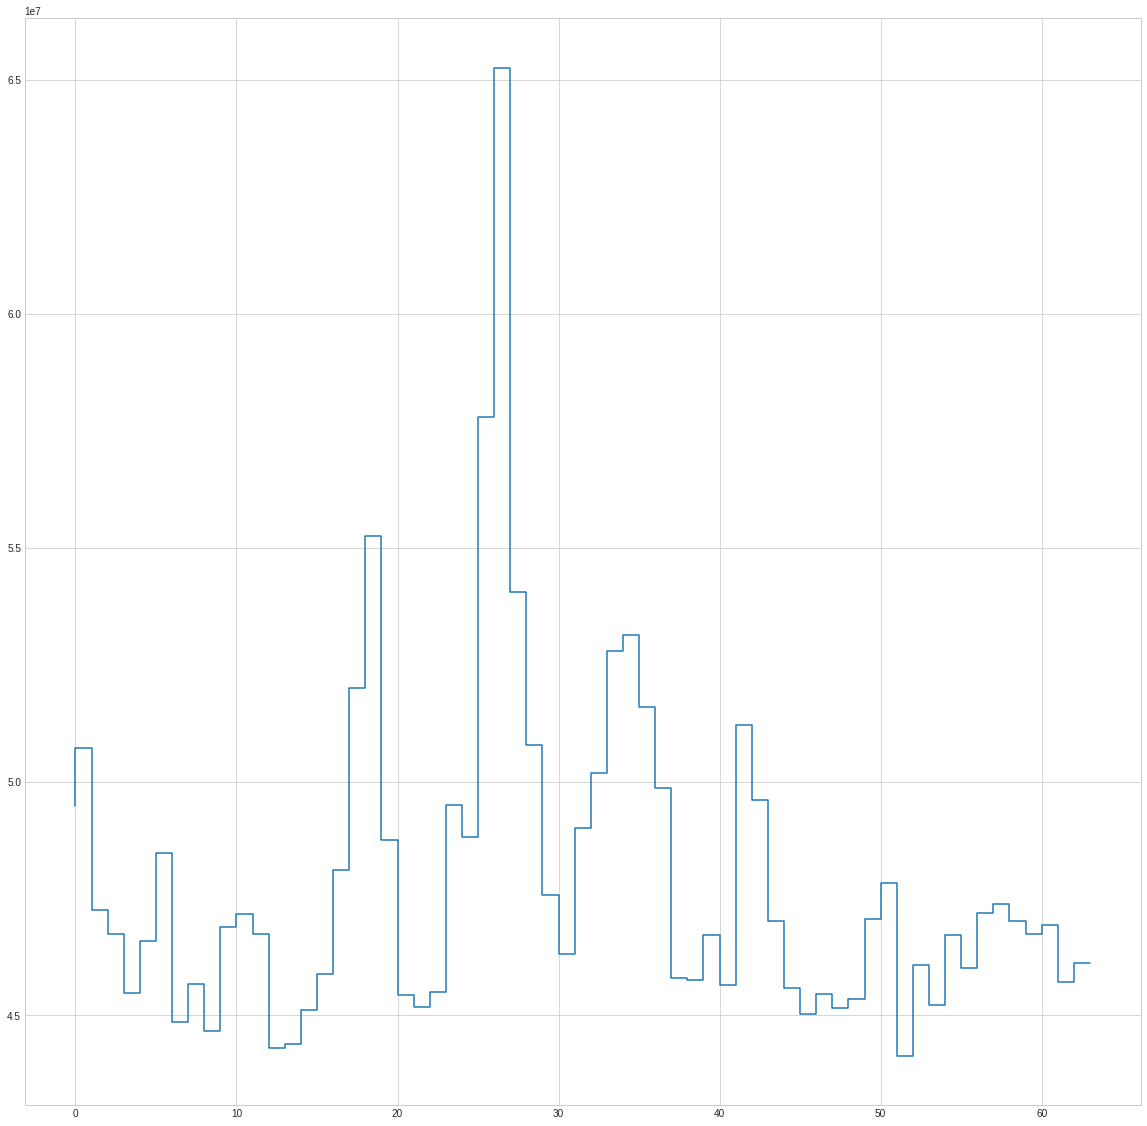

In [105]:
profile = np.sum(all_maxima, axis=0)
_ = plt.step(np.arange(64), profile)


In [2]:


wave = [[
    1554, 1558, 1555, 1564, 1558, 1555, 1556, 1554, 1750, 2284, \
    2424, 2116, 1838, 1713, 1649, 1613, 1601, 1589, 1583, 1578, \
    1572, 1574, 1573, 1569, 1567, 1562, 1563, 1560, 1561, 1557
        ],
        [
    1552, 1550, 1552, 1552, 1553, 1550, 1551, 1554, 1551, 1551,
    1582, 2617, 4401, 4371, 3194, 2360, 2013, 1844, 1743, 1687,
    1658, 1643, 1630, 1617, 1610, 1602, 1598, 1594, 1585, 1577
        ],
        [
    1558, 1558, 1554, 1557, 1560, 1560, 1558, 1559, 1556, 1553,
    1634, 1897, 1984, 1847, 1696, 1629, 1602, 1584, 1579, 1572,
    1572, 1566, 1572, 1563, 1565, 1561, 1561, 1559, 1560, 1556
        ],
    ]


In [3]:
def nrm(x, *par):
    a = x - par[0]
    
    y = par[1]*np.exp(-a**2/par[2]) + par[3]

    return y


In [4]:
def plde(x, *par): # power law double exp
    a = x - par[1]
    print(a)
    y = par[0]*np.float_power(a, par[2])\
        *(((1. - par[5])/np.float_power(par[3],par[2]) \
        *np.exp(par[2]))*np.exp(-a*(par[2]/par[3])) \
        + (par[5] / np.float_power(par[6], par[2]) * np.exp(par[2]))* \
        np.exp(-a*(par[2]/par[6]))) + par[4]
   
    return y
    


In [5]:
def landau(x, *par):
    w = x - par[0]
    return par[1]*np.exp(-(w+np.exp(-par[4]*w))/par[2])+par[3]

R2:  0.9971384301530581  KS:  KstestResult(statistic=0.43333333333333335, pvalue=0.006548396368058784)
R2:  0.9969724800938076  KS:  KstestResult(statistic=0.43333333333333335, pvalue=0.006548396368058784)
R2:  0.9967268678258762  KS:  KstestResult(statistic=0.5, pvalue=0.0008995776840176799)


/tmp/ipykernel_28944/99731705.py:3: RuntimeWarning: overflow encountered in exp
  return par[1]*np.exp(-(w+np.exp(-par[4]*w))/par[2])+par[3]


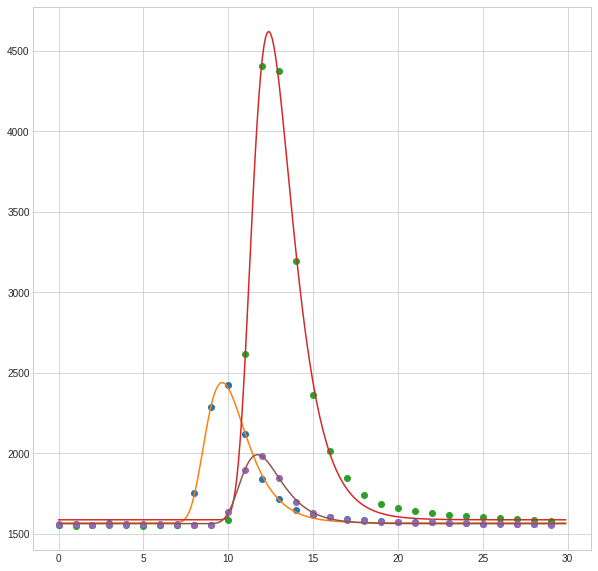

In [8]:
#      par[0]                          //
#      * pow((x[0] - par[1]), par[2])  //
#      * (((1. - par[5]) / pow(par[3], par[2]) * exp(par[2])) *
#             exp(-(x[0] - par[1]) * (par[2] / par[3]))  //
#         + (par[5] / pow(par[6], par[2]) * exp(par[2])) *
#               exp(-(x[0] - par[1]) * (par[2] / par[6]))  //
#        );


x = np.linspace(0, 30, 30, endpoint=False) # print(x)
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,10)


#popt, _ = scipy.optimize.curve_fit(nrm, x, wave, p0=[15, 1000, 10, 1700])
#print(popt)

guess = [
    1000,    # vertical scale
    10,     # time
    2,      # p2
    10,      # p3
    1500,   # pedestal
    10,     # p5
    10       # p6
    ]

# popt, _ = scipy.optimize.curve_fit(nrm, x, wave, p0=[10, 100, 10, 1500]) # , p0=guess)
# popt, _ = scipy.optimize.curve_fit(plde, x, wave, p0=guess)


x1 = np.linspace(0, 30, 300, endpoint=False)


for i in range(0,3):

    plt.plot(x, wave[i], 'o')
    popt, _ = scipy.optimize.curve_fit(landau, x, wave[i], p0=[10, 200, 10, 1500,1 ]) # , p0=guess)
    # print(popt)
    plt.plot(x1, landau(x1, *popt))

    # residual sum of squares
    ss_res = np.sum((wave[i] - landau(x, *popt)) ** 2)

    # total sum of squares
    ss_tot = np.sum((wave[i] - np.mean(wave[i])) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)


    #perform Kolmogorov-Smirnov test
    ks = ks_2samp(wave[i], landau(x, *popt))
    
    print("R2: ", r2, ' KS: ', ks)

#plt.plot(x, wave[1], 'o')
#popt, _ = scipy.optimize.curve_fit(landau, x, wave[1], p0=[10, 200, 10, 1500,1 ]) # , p0=guess)
# print(popt)
#plt.plot(x1, landau(x1, *popt))


    #if abs(x)<0.0001: x=0.0001
    #result = par0*pow(x, par2) + par3
  #+ (par5 / pow(par6, par2) * exp(par2)) * \
         #   exp(-(x - par1) * (par2 / par6)    # * ((1. - par5)/pow(par3, par2)*exp(par2))*exp(-x*(par2 / par3)) + par4